In [1]:
import json
from datetime import datetime

import numpy as np
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    auc,
    roc_curve,
    precision_recall_curve,
    confusion_matrix, 
    ConfusionMatrixDisplay
)
from sklearn.inspection import permutation_importance
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

In [2]:
df = pd.read_csv("./data/S06-hw-dataset-01.csv")

In [3]:
df.head()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 non-null  float64
 18  num18 

In [5]:
df.isna().sum()

id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

In [6]:
df.describe()

,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


target
0    0.676583
1    0.323417
Name: proportion, dtype: float64


<Axes: >

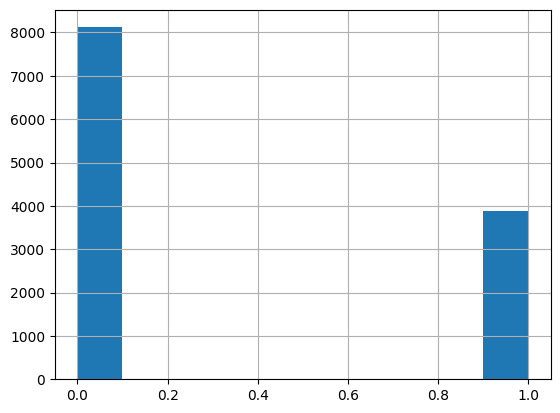

In [7]:
print(df.target.value_counts(normalize=True))
df.target.hist()

In [8]:
X = df.loc[:, "num01":"tenure_months"]
y = df["target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

Необходимо зафиксиировать seed, поскольку важна возобновляемость предсказаний при продолжении эксперемнтов с этими данными. Стратификация нужна, т.к. таргетовая переменная распределена неравномерно (класс "0" - 67.5 %, а класс "1" - 32.3 %)

In [10]:
baseline_dummy = DummyClassifier(strategy="most_frequent", random_state=42)
baseline_dummy.fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,42
,constant,None


In [11]:
baseline_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(random_state=42, max_iter=1000))
])
baseline_logreg.fit(X_train, y_train)

,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [12]:
baselines_metrics = pd.DataFrame({
    
    "baseline_dummy": {
        "accuracy": accuracy_score(y_test, baseline_dummy.predict(X_test)),
        "f1": f1_score(y_test, baseline_dummy.predict(X_test)),
        "roc-auc": roc_auc_score(y_test, baseline_dummy.predict_proba(X_test)[:, 1])
    },
                 
    "baseline_logreg": {
        "accuracy": accuracy_score(y_test, baseline_logreg.predict(X_test)),
        "f1": f1_score(y_test, baseline_logreg.predict(X_test)),
        "roc-auc": roc_auc_score(y_test, baseline_logreg.predict_proba(X_test)[:, 1])
    },
})

baselines_metrics

,baseline_dummy,baseline_logreg
accuracy,0.676667,0.827500
f1,0.000000,0.707627
roc-auc,0.500000,0.874691


DummyClassifier делает предсказания, выбирая самый вероятный класс (которого 67%) - абсолютно случайная (по roc-auc=0.5), бесполезная модель. 
- - -
Логистическая регрессия + стандартизация показывают хороший результат. Попробуем улучшить за счёт деревьев и ансамблей.

In [13]:
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    {
        "max_depth": [3, 5, 7, 10],
        "min_samples_leaf": [5, 10, 20]
    },
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

In [14]:
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    {
        "n_estimators": [100, 200],
        "max_depth": [5, 10],
        "min_samples_leaf": [5, 10]
    },
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [15]:
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    {
        "n_estimators": [100, 200],
        "max_depth": [5, 10],
        "min_samples_leaf": [5, 10]
    },
    cv=3,
    scoring="roc_auc",
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_

In [16]:
trees_metrics = pd.DataFrame({
    
    "decision_tree": {
        "accuracy": accuracy_score(y_test, dt_best.predict(X_test)),
        "f1": f1_score(y_test, dt_best.predict(X_test)),
        "roc-auc": roc_auc_score(y_test, dt_best.predict_proba(X_test)[:, 1])
    },
                 
    "random_forest": {
        "accuracy": accuracy_score(y_test, rf_best.predict(X_test)),
        "f1": f1_score(y_test, rf_best.predict(X_test)),
        "roc-auc": roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])
    },

    "gradient_boosting": {
        "accuracy": accuracy_score(y_test, gb_best.predict(X_test)),
        "f1": f1_score(y_test, gb_best.predict(X_test)),
        "roc-auc": roc_auc_score(y_test, gb_best.predict_proba(X_test)[:, 1])
    },
})

trees_metrics

,decision_tree,random_forest,gradient_boosting
accuracy,0.868333,0.910833,0.937917
f1,0.787919,0.850350,0.900997
roc-auc,0.906695,0.959945,0.972440


Самой топовой моделью оказался градиентный бустинг с ROC-AUC=0.972

In [17]:
baselines_metrics.join(trees_metrics).to_json("./artifacts/metrics_test.json")

pd.DataFrame({
    "decision_tree": {
        "roc-auc": dt_grid.best_score_,
        "best_params": dt_grid.best_params_
    },
                 
    "random_forest": {
        "roc-auc": rf_grid.best_score_,
        "best_params": rf_grid.best_params_    
    },

    "gradient_boosting": {
        "roc-auc": gb_grid.best_score_,
        "best_params": gb_grid.best_params_
    },
}).to_json("./artifacts/search_summaries.json")

dump(gb_best, "./artifacts/best_model.joblib") 

with open('./artifacts/best_model_meta.json', 'w', encoding='utf-8') as f:
    json.dump(
        {
            'best_model': "GradientBoostingClassifier",
            'cv_params': gb_grid.best_params_, 
            'cv_roc_auc': gb_grid.best_score_, 
            'test_metrics': {
                'accuracy': trees_metrics["gradient_boosting"]['accuracy'],
                'f1': trees_metrics["gradient_boosting"]['f1'],
                'roc_auc': trees_metrics["gradient_boosting"]['roc-auc']
            },
            'timestamp': datetime.now().isoformat(),
            'dataset_info': {
                'n_samples': len(df),
                'n_features': X.shape[1],
                'target_balance': float(y.mean()),
                'train_size': len(X_train),     
                'test_size': len(X_test),       
                'train_ratio': len(X_train) / len(df), 
                'test_ratio': len(X_test) / len(df) 
            }
    }, f)



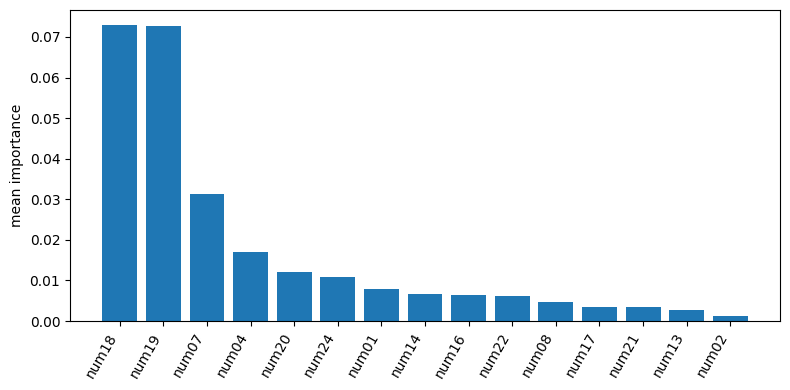

In [18]:
perm = permutation_importance(
    gb_best, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc"
)

importances = perm.importances_mean

idx = np.argsort(importances)[::-1][:15]

plt.figure(figsize=(8, 4))
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), [X_test.columns[i] for i in idx], rotation=60, ha="right")
plt.ylabel("mean importance")
plt.tight_layout()
plt.savefig("./artifacts/figures/perm-importancees.png", dpi=300, bbox_inches="tight")
plt.show()

num18/19/07 - три ключевых признака, которые больше всех влияют на работу данной модели.

- num18 и num19 (0.07) — доминируют
- num07 (порядка 0.03) — менее значимый

Остальные признаки в массе своей также влияют на принятие решений, однако в гораздо меньшей мере

Далее выполним визуализацию метрик, чтобы сравнить модели наглядно.

In [19]:
models = {
    "DecisionTree": dt_best,
    "RandomForest": rf_best, 
    "GradientBoosting": gb_best
}

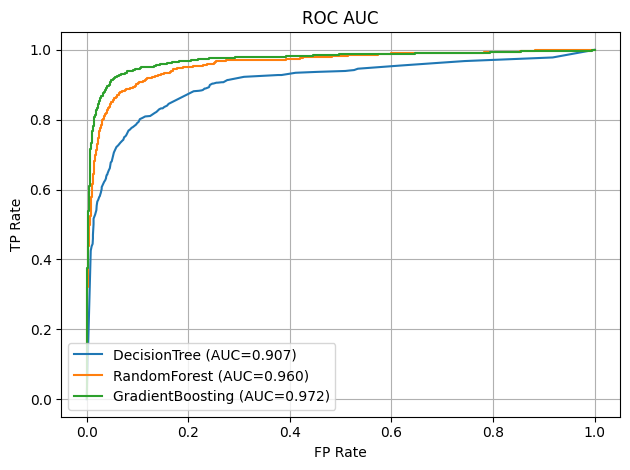

In [20]:
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.xlabel("FP Rate")
plt.ylabel("TP Rate")
plt.title("ROC AUC")
plt.legend(loc="lower left")

plt.grid(True)
plt.tight_layout()
plt.savefig("./artifacts/figures/roc-auc-curves.png", dpi=300, bbox_inches="tight")
plt.show()

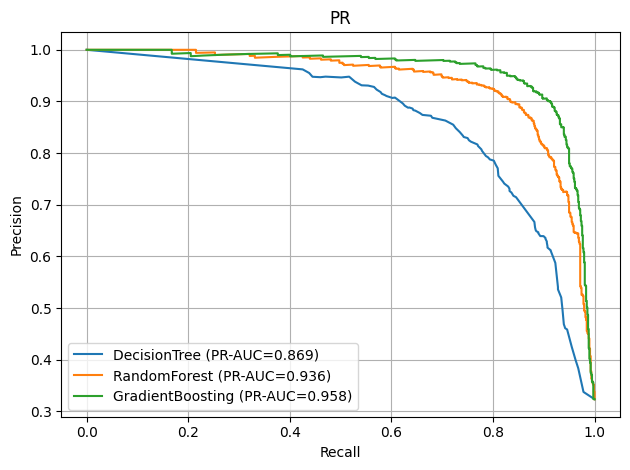

In [21]:
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (PR-AUC={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision") 
plt.title("PR")
plt.grid(True)
plt.legend(loc="lower left")

plt.tight_layout()
plt.savefig("./artifacts/figures/pr-curves-curves.png", dpi=300, bbox_inches="tight")
plt.show()

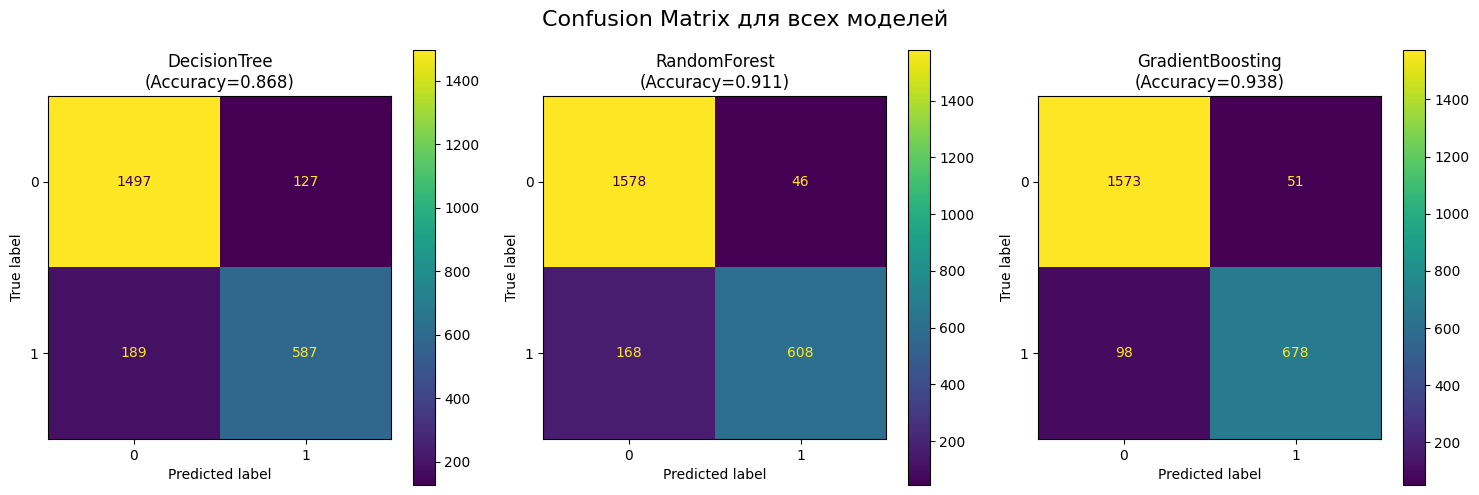

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], cmap="viridis", values_format="d")
    axes[idx].set_title(f"{name}\n(Accuracy={accuracy_score(y_test, y_pred):.3f})")

plt.suptitle("Confusion Matrix для всех моделей", fontsize=16)
plt.tight_layout()
plt.savefig("./artifacts/figures/confusion_matrices.png", dpi=150, bbox_inches="tight")
plt.show()

Проведём анализ на устойчивость модели с помощью изменения `random_state`

In [23]:
results = {}
seeds = [42, 123, 777, 100, 200]

for seed in seeds:
    
    print(f"Seed = {seed}")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    
    gb = GradientBoostingClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=10,
        random_state=seed,  
    )
    
    gb.fit(X_train, y_train)
    
    results[seed] = {
        "accuracy": accuracy_score(y_test, gb.predict(X_test)),
        "f1": f1_score(y_test, gb.predict(X_test)),
        "roc-auc": roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1])
    }

df_results = pd.DataFrame(results).T
df_results['roc-auc-std'] = df_results['roc-auc'].std()
df_results['f1-std'] = df_results['f1'].std()
df_results

Seed = 42
Seed = 123
Seed = 777
Seed = 100
Seed = 200


,accuracy,f1,roc-auc,roc-auc-std,f1-std
42,0.937917,0.900997,0.972440,0.003895,0.007899
123,0.945417,0.912140,0.975723,0.003895,0.007899
777,0.945833,0.912869,0.979990,0.003895,0.007899
100,0.950417,0.921348,0.981909,0.003895,0.007899
200,0.940417,0.904730,0.974712,0.003895,0.007899


Прогон моделей на разных сидах показал её хорошую устойчивость и готовность к работе